In [880]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [881]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [882]:
SALARY_FIELD = 'Salary'

In [883]:
QUESTION_FIELD = 'PronounceGIF'

In [884]:
SALARY_MINIMUM = 1

In [885]:
AGG_FN = 'median'

In [886]:
qdf = pd.read_csv('./developer_survey_2017/survey_results_schema.csv').to_dict('s')
qs = dict(zip(qdf['Column'], qdf['Question']))

In [887]:
df = pd.read_csv('./developer_survey_2017/survey_results_public.csv')

In [888]:
df.dropna(subset=[SALARY_FIELD, QUESTION_FIELD], how='any', inplace=True)
#df = df[df['Currency'] == 'U.S. dollars ($)']
df = df[df['Country'] == 'United States']

In [889]:
smalldf = df[[SALARY_FIELD, QUESTION_FIELD]]

In [890]:
x = pd.DataFrame(smalldf[QUESTION_FIELD].astype(str).str.split(';').tolist(), index=smalldf[SALARY_FIELD])
x = x.reset_index()[[0, SALARY_FIELD]]
x.columns = [QUESTION_FIELD, SALARY_FIELD]
smalldf = x

In [891]:
smalldf = smalldf[smalldf[SALARY_FIELD] >= SALARY_MINIMUM]

In [892]:
groupby = smalldf.groupby(QUESTION_FIELD)

In [893]:
agg = groupby.agg(['count', AGG_FN]).reset_index()
sal = agg[SALARY_FIELD]
agg[SALARY_FIELD] = sal[sal['count'] > 50]
result = agg.dropna().sort_values([(SALARY_FIELD, AGG_FN)], ascending=False)
result

PronounceGIF  Salary         
                                  count   median
2  With a hard "g," like "gift"  2529.0  95000.0
3  With a soft "g," like "jiff"  1141.0  93500.0
1                Some other way    74.0  89786.5

In [894]:
num_respondents = result[(SALARY_FIELD, 'count')].sum()

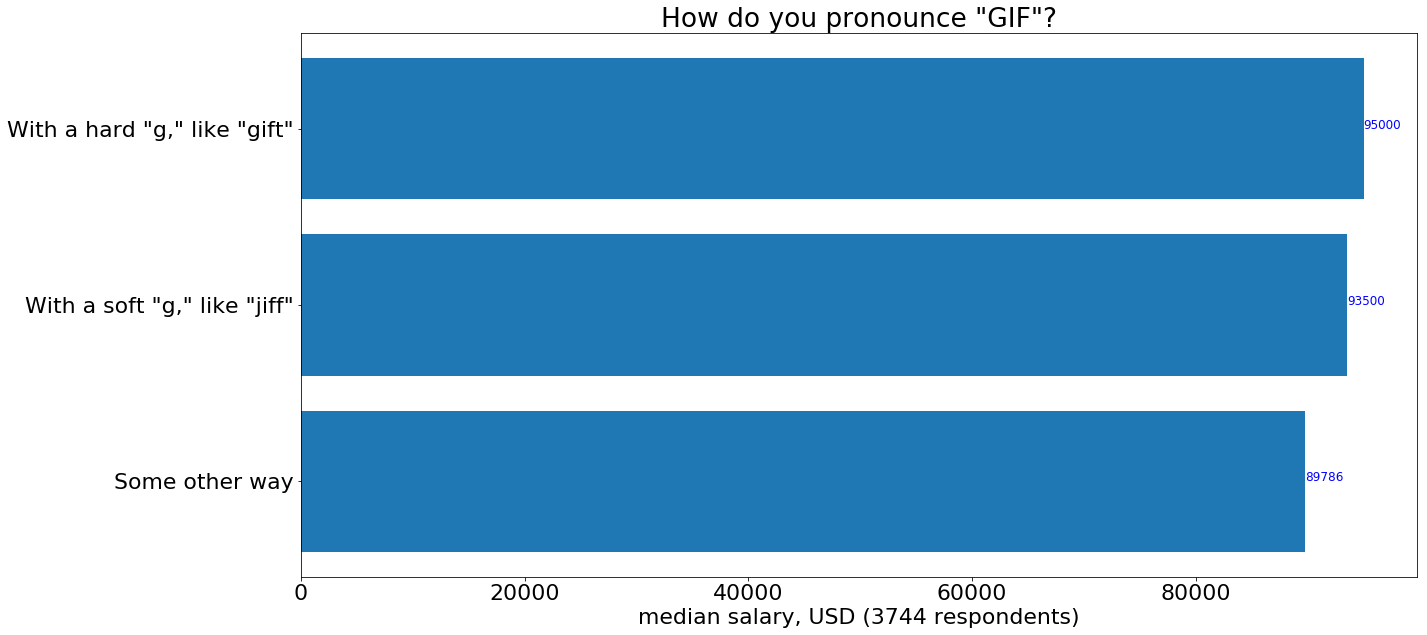

In [895]:
xs = result[QUESTION_FIELD]
xpos = np.arange(len(xs))[::-1]
ys = result[(SALARY_FIELD, AGG_FN)]
fig, ax = plt.subplots()    
plt.barh(xpos, ys)
plt.yticks(xpos, xs)
plt.xlabel('%s %s, USD (%d respondents)' % (AGG_FN, SALARY_FIELD.lower(), num_respondents))
plt.title(qs[QUESTION_FIELD])
for i, v in enumerate(ys):
    plt.text(v, len(ys) - 1 - i, int(v), color='blue', fontweight='normal', fontsize=12)
plt.show()

In [896]:
groupby.std()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",30741.987888
Some other way,34255.759919
"With a hard ""g,"" like ""gift""",34426.699483
"With a soft ""g,"" like ""jiff""",35925.868013


In [897]:
groupby.median()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",80000.0
Some other way,89786.5
"With a hard ""g,"" like ""gift""",95000.0
"With a soft ""g,"" like ""jiff""",93500.0


In [898]:
groupby.min()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",150.0
Some other way,85.0
"With a hard ""g,"" like ""gift""",80.0
"With a soft ""g,"" like ""jiff""",5.0


In [899]:
groupby.max()

,Salary
PronounceGIF,
"Enunciating each letter: ""gee eye eff""",160000.0
Some other way,167000.0
"With a hard ""g,"" like ""gift""",195000.0
"With a soft ""g,"" like ""jiff""",197000.0
